In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('ggplot')

p =  0.5 M =  100


/home/raghav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


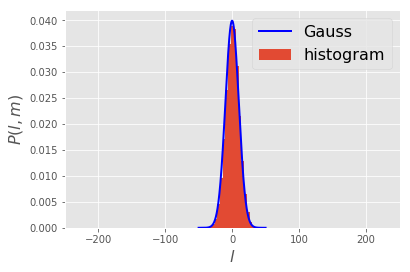

In [3]:
p = 0.5 # probability of stepping to the right
M = 100 # number of total steps
N = 100000 # number of random walkers
ave = M*(2*p-1) # average of location L after M steps
std = np.sqrt(4*M*p*(1-p))
print('p = ',p,'M = ',M)
L = np.zeros(N)
np.random.seed(0) # initialize random number generator
for i in range(N):
    step=np.random.choice([-1,1],M)
    L[i]=np.sum(step)
nmin=np.int(ave-std*5)
nmax=np.int(ave+std*5)
nbin=np.int((nmax-nmin)/4)
plt.hist(L,range=[nmin,nmax],bins=nbin,normed=True)
x = np.arange(nmin,nmax,0.01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
plt.plot(x,y,lw=2,color='b')
plt.xlabel(r'$l$',fontsize=16)
plt.ylabel(r'$P(l,m)$',fontsize=16)
plt.legend([r'Gauss',r'histogram'],fontsize=16)
plt.xlim(ave-250,ave+250)
plt.show()

In [6]:
def rng(seed, a, b, M, ntotal):
    data = np.zeros(ntotal)
    data[0] = seed
    for i in range(1,ntotal):
        data[i] = np.mod((a*data[i-1]+b), M)
    return data/np.float(M)

In [7]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[500000-1:]

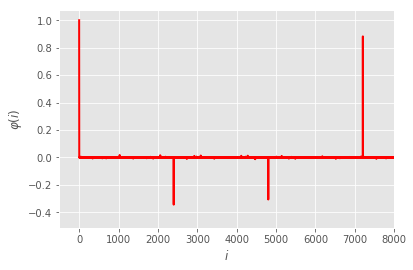

In [22]:
L = rng(123456,8121,28411,134456,500000)
c = auto_correlate(L-np.average(L))/(500000)
plt.plot(c/c[0],'r',lw=2)
plt.xlim(-500,8000)
plt.xlabel(r'$i$')
plt.ylabel(r'$\varphi(i)$')
plt.show()

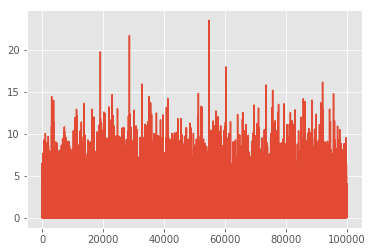

0.95442


In [23]:
N = 10**5
np.random.seed(0)
X = np.random.randn(N)
Nout = 0
for i in range(N):
    X[i] = X[i]**2
    if X[i]<=2**2:
        Nout = Nout+1
plt.plot(X)
plt.show()
print(Nout/N)